In [36]:
import tensorflow as tf
import quickdraw as qd
import os
import matplotlib.pyplot as plt
import pickle

In [37]:
input = qd.QuickDrawData()
input_data = []

In [38]:
def get_data(name, max_drawings, recognized):
    drawings = qd.QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for drawing in drawings.drawings:
        input_data.append([name, drawing.image_data])

In [39]:
def get_images(data, count, label, number):
    x = []
    y = []
    for strokes in data:
        xs = strokes[0]
        ys = strokes[1]
        x.append(xs)
        y.append(ys)
    plt.figure(figsize = (0.32, 0.32), dpi = 100)
    for i in range(len(x)):
        plt.plot(x[i], y[i], color = "black")
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.axis("off")
    if not os.path.isdir(f"google_{number}_image_images/{label}"):
        os.makedirs(f"google_{number}_image_images/{label}")
    plt.savefig(f"google_{number}_image_images/{label}/{count}.png")
    plt.clf()
    plt.close()

In [40]:
def get_custom_images(data, count, label, number):
    x = []
    y = []
    for strokes in data:
        xs = strokes[0]
        ys = strokes[1]
        x.append(xs)
        y.append(ys)
    plt.figure(figsize = (0.32, 0.32), dpi = 100)
    for i in range(len(x)):
        plt.plot(x[i], y[i], color = "black")
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.axis("off")
    if not os.path.isdir(f"custom_{number}_image_images/{label}"):
        os.makedirs(f"custom_{number}_image_images/{label}")
    plt.savefig(f"custom_{number}_image_images/{label}/{count}.png")
    plt.clf()
    plt.close()

In [41]:
number = 3000
i = 1
for label in qd.QuickDrawData().drawing_names:
    print(f"{i} / 345")
    get_data(label, max_drawings=number, recognized=True)
    i += 1

with open (f"google_{number}_image_stroke_data", "wb") as file:
    pickle.dump(input_data, file)

1 / 345
loading aircraft carrier drawings
load complete
2 / 345
loading airplane drawings
load complete
3 / 345
loading alarm clock drawings
load complete
4 / 345
loading ambulance drawings
load complete
5 / 345
loading angel drawings
load complete
6 / 345
loading animal migration drawings
load complete
7 / 345
loading ant drawings
load complete
8 / 345
loading anvil drawings
load complete
9 / 345
loading apple drawings
load complete
10 / 345
loading arm drawings
load complete
11 / 345
loading asparagus drawings
load complete
12 / 345
loading axe drawings
load complete
13 / 345
loading backpack drawings
load complete
14 / 345
loading banana drawings
load complete
15 / 345
loading bandage drawings
load complete
16 / 345
loading barn drawings
load complete
17 / 345
loading baseball bat drawings
load complete
18 / 345
loading baseball drawings
load complete
19 / 345
loading basket drawings
load complete
20 / 345
loading basketball drawings
load complete
21 / 345
loading bat drawings
load 

In [42]:
import ndjson
number = 3000
labels = ["accessory", "cats", "construction", "fruit", "instrument", "one_liner", "plant", "shape", "sport", "terrain", "tool", "vehicle", "weapon", "weather", "writing_utensil"]
for label in labels:
    with open(f"CustomAssets/{label}.ndjson") as file:
        temp = ndjson.load(file)
        i = 1
        for data in temp:
            if (i > number):
                break
            else:
                get_custom_images(data["strokes"], i, data["category"], number)
                i += 1

In [43]:
len(input_data)

1035000

KeyboardInterrupt: 

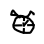

In [45]:
number = 3000
i = 1
for drawing in input_data:
    label = drawing[0]
    data = drawing[1:][0]
    get_images(data, i, label, number)
    i += 1

In [49]:
batch_size = 100

# 70% Train
train = tf.keras.utils.image_dataset_from_directory(
    "./images",
    validation_split=0.2,
    subset = "training",
    seed = 1,
    color_mode = "grayscale",
    image_size = (32, 32),
    batch_size = batch_size,
    labels = "inferred"
)

# 30% Validate
val = tf.keras.utils.image_dataset_from_directory(
    "./images",
    validation_split = 0.2,
    subset = "validation",
    seed = 1,
    color_mode = "grayscale",
    image_size = (32, 32),
    batch_size = batch_size,
    labels = "inferred"
)

Found 635719 files belonging to 216 classes.
Using 508576 files for training.
Found 635719 files belonging to 216 classes.
Using 127143 files for validation.


In [52]:
#model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1 / 255, input_shape=(32, 32, 1)))      #required
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(3, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(7, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(360, activation='softmax'))                #required

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit = model.fit(
    train,
    validation_data=val,
    epochs=epochs,
    verbose=1,
    callbacks = [callback]
)

Epoch 1/100
5086/5086 [==============================] - 2547s 500ms/step - loss: 2.2430 - accuracy: 0.4607 - val_loss: 1.8560 - val_accuracy: 0.5314
Epoch 2/100
5086/5086 [==============================] - 2536s 498ms/step - loss: 1.7200 - accuracy: 0.5604 - val_loss: 1.7087 - val_accuracy: 0.5604
Epoch 3/100
5086/5086 [==============================] - 2468s 485ms/step - loss: 1.5918 - accuracy: 0.5868 - val_loss: 1.6529 - val_accuracy: 0.5734
Epoch 4/100
 262/5086 [>.............................] - ETA: 34:56 - loss: 1.5461 - accuracy: 0.5973

KeyboardInterrupt: 

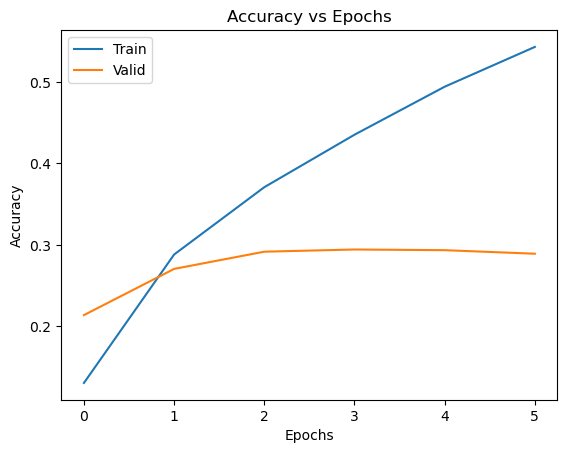

In [54]:
plt.plot(fit.history["accuracy"], label = "Train")
plt.plot(fit.history["val_accuracy"], label = "Valid")
plt.legend()
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

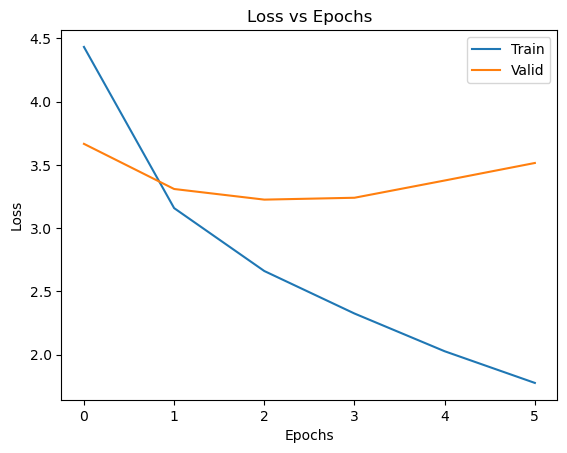

In [55]:
plt.plot(fit.history["loss"], label = "Train")
plt.plot(fit.history["val_loss"], label = "Valid")
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [56]:
model.save("model")
model.save("model.h5")
import os
os.listdir("images")

INFO:tensorflow:Assets written to: google_50_image_model\assets


INFO:tensorflow:Assets written to: google_50_image_model\assets
c:\Users\peika\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['accessory',
 'aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'cats',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'construction',
 'cookie',
 'cooler',
 'couch',
 'cow',
